In [122]:
print("Stock Technical Analysis I")

Stock Technical Analysis I


In [123]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np

today = date.today().replace(month=date.today().month)
start_date = today - relativedelta(days=60)


print("Period of calculation,",today, "-", start_date)

Period of calculation, 2024-01-20 - 2023-11-21


In [124]:
stock_ticker='MSFT'

df = yf.download(stock_ticker,
                 start=start_date,
                 end=today,
                 progress=False)
df.head()

# make Date as a part of the table
df.reset_index(inplace=True)


Plot the adjusted close


Text(0.5, 1.0, 'The Stock Price of MSFT')

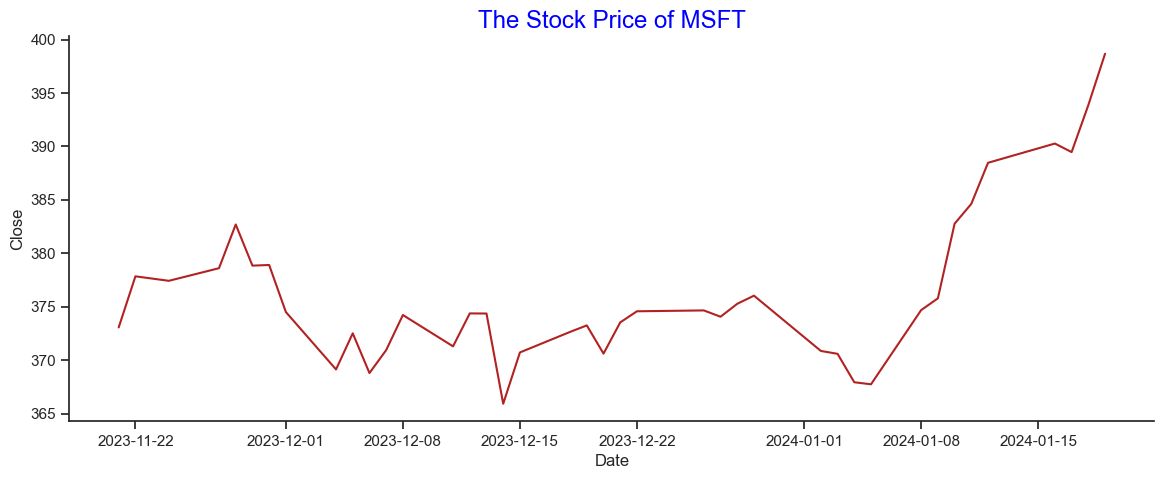

In [125]:
print("Plot the adjusted close")
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()


plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="Date",y='Close',color='firebrick')
sns.despine()
plt.title(f"The Stock Price of {stock_ticker}",size='x-large',color='blue')


Text(0.5, 1.0, 'The Stock Price of MSFT')

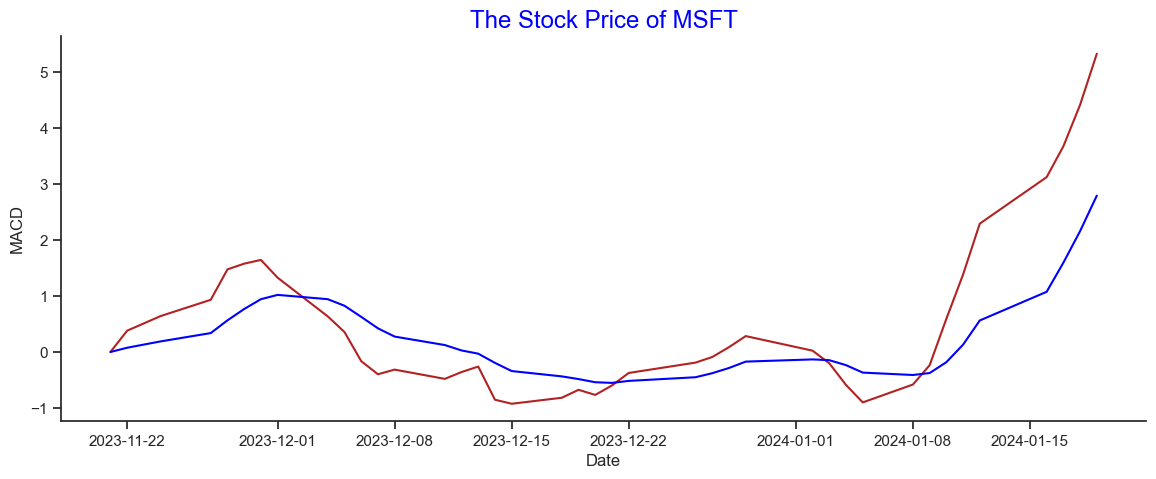

In [126]:
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()


plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="Date",y='MACD',color='firebrick')
sns.lineplot(data=df,x="Date",y='Signal_Line',color='blue')
sns.despine()
plt.title(f"The Stock Price of {stock_ticker}",size='x-large',color='blue')



In [127]:
df['SMA'] = df['Close'].rolling(window=20).mean()
df['SD'] = df['Close'].rolling(window=20).std()

df['BB_UPPER'] = df['SMA'] + 2 * df['SD']
df['BB_LOWER'] = df['SMA'] - 2 * df['SD']

In [128]:
change = df['Close'].diff()
change.dropna(inplace=True)

# two copies 
change_up = change.copy()
change_down = change.copy()

# zero out opposite trend
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# verify the above zero outting
change.equals(change_up+change_down)

# averages 
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

# relative stregth
rsi = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
rsi.dropna(inplace=True)

In [129]:
signal = float(df['Signal_Line'].tail(1))
macd = float(df['MACD'].tail(1))
close = float(df['Close'].tail(1))


print(close, macd, signal)



398.6700134277344 5.332486618631492 2.795393876276089


In [130]:
bb_upper = float(df['BB_UPPER'].tail(1))
bb_lower = float(df['BB_LOWER'].tail(1))
bb_mean = float(df['SMA'].tail(1))

print(close,bb_mean,bb_upper,bb_lower)

398.6700134277344 378.7290008544922 396.9586329156593 360.4993687933251


In [131]:
print(float(rsi.tail(1)))

78.13328184670591


In [132]:
from termcolor import colored, cprint

text = colored('Hello, World!', 'red', attrs=['reverse', 'blink'])
print(text)




Hello, World!


In [133]:
df["simple_rtn"] = df["Adj Close"].pct_change()
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

df_rv = df.groupby(pd.Grouper(freq="M")).apply(realized_volatility).rename(columns={"log_rtn":"rv"})

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'